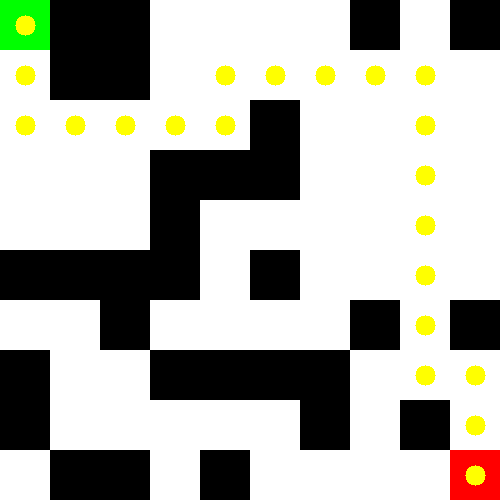

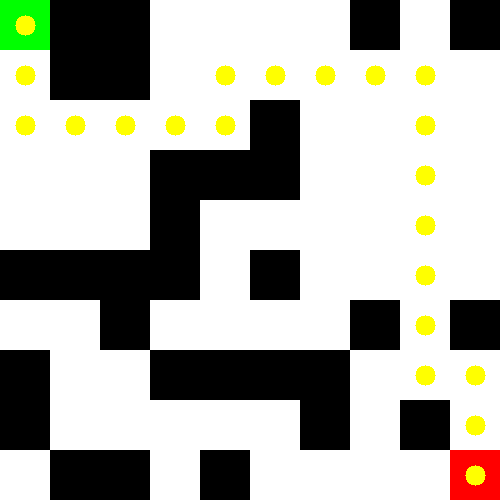

In [3]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import cv2

# Step 1: Generate a Synthetic City Map
def generate_city_map(grid_size=10, obstacle_prob=0.3):
    np.random.seed(42)
    city_map = np.random.choice([0, 1], size=(grid_size, grid_size), p=[1-obstacle_prob, obstacle_prob])
    city_map[0][0] = 2  # Start
    city_map[grid_size-1][grid_size-1] = 3  # End
    return city_map

# Step 2: Define A* Search Algorithm
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

def heuristic(a, b):
    """Calculate Manhattan distance heuristic."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(city_map, start, end):
    """Find the shortest path using A* Search."""
    grid_size = city_map.shape[0]
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {start: None}
    g_score = {pos: float("inf") for pos in np.ndindex(city_map.shape)}
    g_score[start] = 0

    f_score = {pos: float("inf") for pos in np.ndindex(city_map.shape)}
    f_score[start] = heuristic(start, end)

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == end:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in DIRECTIONS:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if (0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and city_map[neighbor] != 1):
                tentative_g_score = g_score[current] + 1
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # No path found

# Step 3: Run A* Search on the generated city map
grid_size = 10
city_map = generate_city_map(grid_size)

start = (0, 0)
end = (grid_size - 1, grid_size - 1)
optimal_path = a_star_search(city_map, start, end)

# Step 5: Visualizing the Optimized Road Network Using OpenCV
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

def visualize_city_map(city_map, optimal_path, cell_size=50):
    grid_size = city_map.shape[0]
    img = np.ones((grid_size * cell_size, grid_size * cell_size, 3), dtype=np.uint8) * 255

    # Draw grid and obstacles
    for i in range(grid_size):
        for j in range(grid_size):
            color = (255, 255, 255)  # White for roads
            if city_map[i][j] == 1:
                color = (0, 0, 0)  # Black for obstacles
            elif (i, j) == start:
                color = (0, 255, 0)  # Green for start
            elif (i, j) == end:
                color = (0, 0, 255)  # Red for end

            cv2.rectangle(img, (j * cell_size, i * cell_size),
                          ((j + 1) * cell_size, (i + 1) * cell_size), color, -1)

    # Draw optimal path
    if optimal_path:
        for (i, j) in optimal_path:
            cv2.circle(img, (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2),
                       10, (0, 255, 255), -1)

    # Display the image in Colab
    cv2_imshow(img)

# Call visualization function
visualize_city_map(city_map, optimal_path)
